Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Main import statements.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
# Selecting the fast plotting style to use moving forward.
plt.style.use('fast')

In [6]:
# Reading in the titanic dataset
# and displaying the first five records from the dataset.
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [7]:
# Displaying the counts from the Passenger Class column
# of the dataset and sorting highest to lowest(1st class to 3rd class).
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [8]:
# Converting the string values to categories.
# Making a new column named cabin_class.
titanic['cabin_class'] = titanic['Pclass'].map({1: 'first', 2: 'second', 3: 'third'})
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
21,0,3,female,8.0,21.0750,Southampton,third
318,0,2,male,46.0,26.0000,Southampton,second
92,0,1,male,24.0,247.5208,Cherbourg,first
228,0,3,male,33.0,8.6625,Cherbourg,third
279,1,3,male,3.0,15.9000,Southampton,third


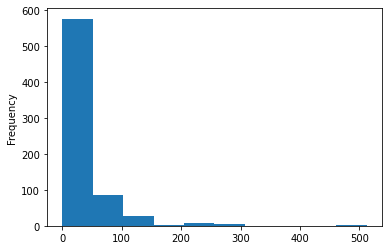

In [9]:
 # Display the Fare column using a histograph.
 titanic['Fare'].plot(kind='hist');

In [0]:
# Removing the outliers from the end of the graph.
titanic = titanic[titanic['Fare']<500]

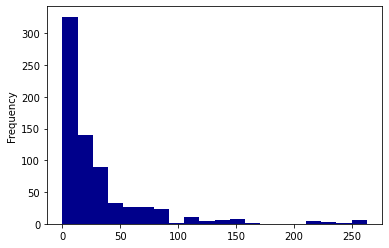

In [11]:
titanic['Fare'].plot(kind='hist', color='darkblue', bins=20);

In [12]:
# Describe the Fare vaiable.
titanic['Fare'].describe()

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

In [14]:
# Use binning to convert the variables to 
# categorical variables.
farelabels = ['low', 'medium', 'high', 'veryhigh']
titanic['fare_groups'] = pd.cut(titanic['Fare'],
                                bins=[0,8,15,32,266], labels=farelabels)
titanic[['Fare', 'fare_groups']].head()


,Fare,fare_groups
0,7.2500,low
1,71.2833,veryhigh
2,7.9250,low
3,53.1000,veryhigh
4,8.0500,medium


In [0]:
fare_results = titanic['fare_groups'].value_counts().sort_index()

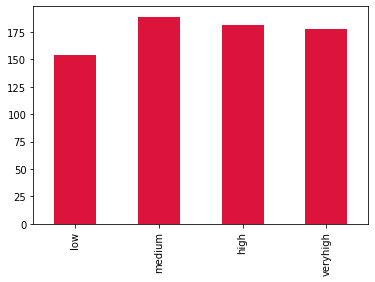

In [16]:
fare_results.plot(kind='bar', color='crimson');

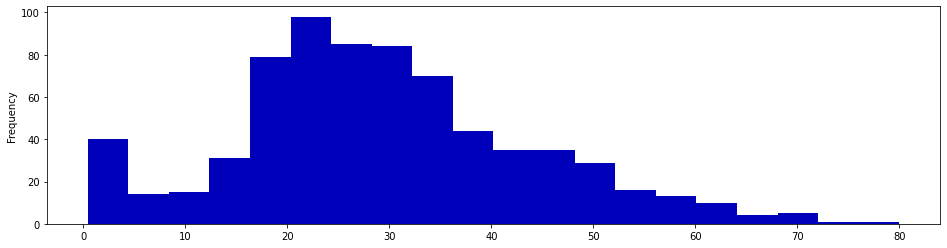

In [17]:
# Using a historgram, display a continuous variable.
titanic['Age'].plot(kind='hist',
                    bins=20,
                    figsize=(16,4),
                    color='#0000BB');

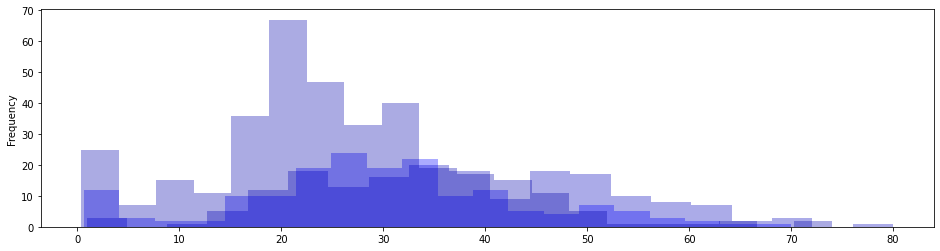

In [20]:
# Stack the histograms.
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist',
                    bins=20,
                    figsize=(16,4),
                    color='#0000BB', alpha=0.33);
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist',
                    bins=20,
                    figsize=(16,4),
                    color='#0000FF', alpha=0.33);
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist',
                    bins=20,
                    figsize=(16,4),
                    color='#0000AB', alpha=0.33);

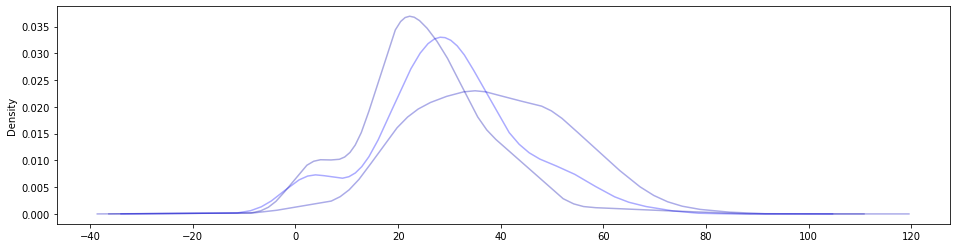

In [23]:
# Using KDE will display this better.
titanic[titanic['Pclass']==1]['Age'].plot(kind='density',
                    figsize=(16,4),
                    color='#0000BB', alpha=0.33);
titanic[titanic['Pclass']==2]['Age'].plot(kind='density',
                    figsize=(16,4),
                    color='#0000FF', alpha=0.33);
titanic[titanic['Pclass']==3]['Age'].plot(kind='density',
                    figsize=(16,4),
                    color='#0000AB', alpha=0.33);

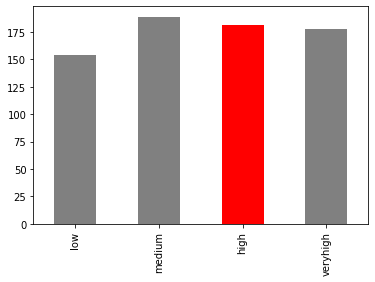

In [25]:
# Add a splash of color to a bar chart.
titanic['fare_groups'].value_counts().sort_index().plot(kind='bar',
                                                      color=['gray', 'gray', 'red', 'gray'])

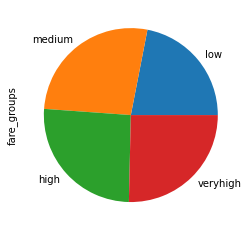

In [27]:
# Use a pie chart to display fair_groups column.
titanic['fare_groups'].value_counts().sort_index().plot(kind='pie',
                                                        figsize=(4,4));

In [28]:
# Compare cabin_class and Survived variables using a crosstab.
class_surv = pd.crosstab(titanic['cabin_class'], titanic['Survived'])
class_surv

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


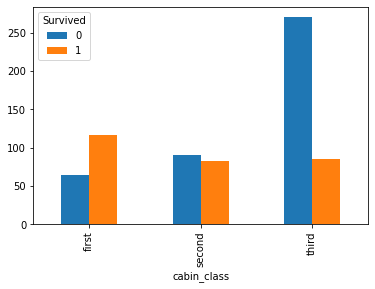

In [29]:
# Take the values from above and bar chart it.
class_surv.plot(kind='bar');


In [31]:
class_surv_norm = pd.crosstab(titanic['cabin_class'],
                              titanic['Survived'], normalize='columns')
class_surv_norm

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


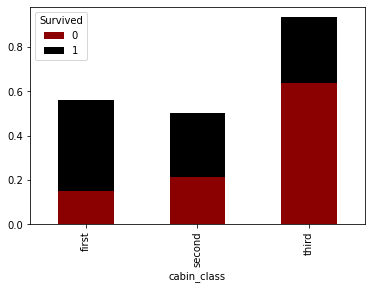

In [33]:
# Use a stacked bar chart to compare two value.
class_surv_norm.plot(kind='bar', stacked=True,
                     color=['darkred', 'black']);

In [35]:
# Crosstab the data using the index.
class_surv_index = pd.crosstab(titanic['cabin_class'],
                               titanic['Survived'],
                               normalize='index');
class_surv_index

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


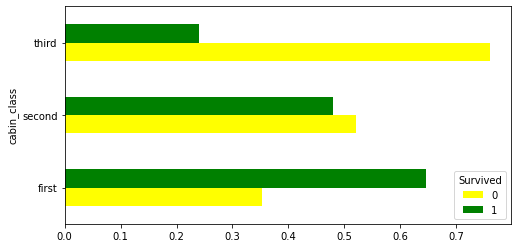

In [36]:
# Display using a stacked horizontal bar chart.
# Using yellow and green - cuz this is the frozen tundra!!
class_surv_index.plot(kind='barh', color=['yellow', 'green'],
                      figsize=(8,4));

In [37]:
# Using Age, display the statistics of the column data.
titanic['Age'].describe()
titanic['Age'].mean()
titanic['Age'].median()
titanic['Age'].std()
titanic['Age'].describe()

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [39]:
# Break up this information into categories using Age.
AgeCat = titanic.groupby('cabin_class')['Age'].mean()
AgeCat

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

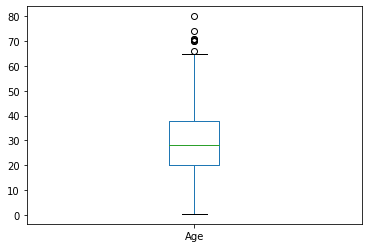

In [40]:
# Use a box plot to display the Age variable.
titanic['Age'].plot(kind='box');

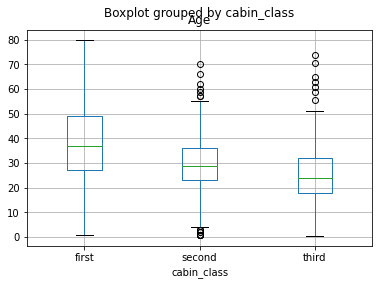

In [41]:
plt.style.use('fast')
titanic.boxplot(column='Age',
                by='cabin_class');

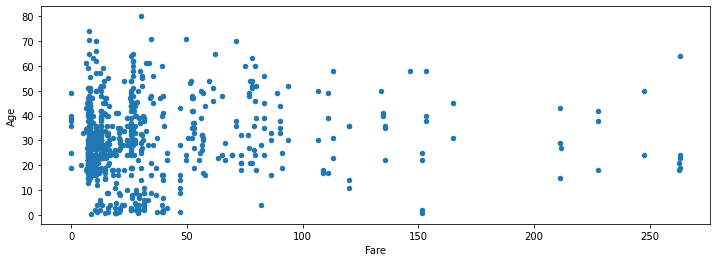

In [42]:
# Dispaly Fare and Age using a scatterplot.
titanic.plot(kind='scatter', x='Fare', y='Age',
             figsize=(12,4));

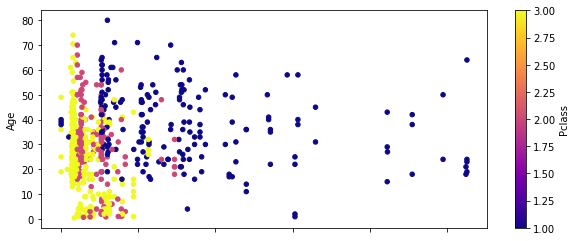

In [44]:
# Use a scatterplot to display three variables.
plt.style.use('fast')
titanic.plot(kind='scatter',
             x='Fare', y='Age', c='Pclass',
             colormap='plasma', figsize=(10,4));

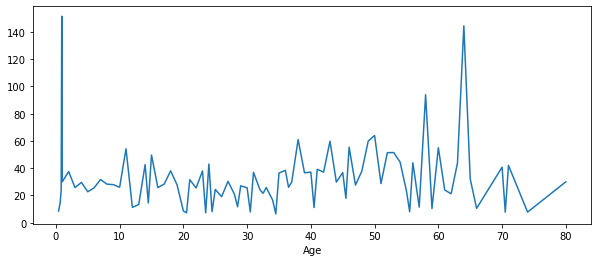

In [46]:
# Use linechart to display the age variable by the Fare variable.
titanic.groupby('Age')['Fare'].mean().plot(kind='line',
                                           figsize=(10,4));

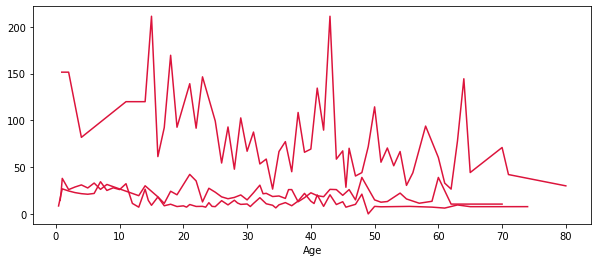

In [51]:
mycolors=['crimson', 'purple', 'dodgerblue']
# Use a for loop to display the same variables.
for x in [1,2,3]:
  titanic[titanic['Pclass']==x].groupby('Age')['Fare'].mean().plot(kind='line',
                                                           figsize=(10,4),
                                                           color=mycolors);

In [52]:
# Display the correlations.
titanic.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


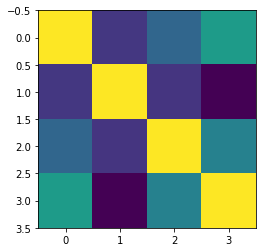

In [53]:
plt.imshow(titanic.corr());

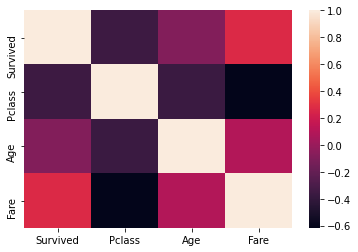

In [54]:
sns.heatmap(titanic.corr());

In [55]:
x = np.linspace(0,5,11)
y = x**2
x, y

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
        20.25, 25.  ]))

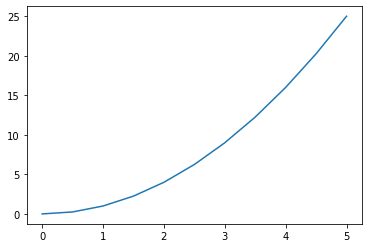

In [56]:
# Plot without using the pandas library, just matplotlib.pyplot.
plt.plot(x,y);

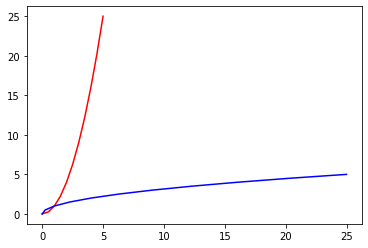

In [57]:
# Diplay two matplotlib.pyplots together.
plt.plot(x,y,'r')
plt.plot(y,x, 'b');

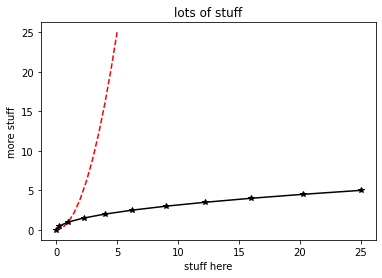

In [58]:
# Adding labels and colors to the plot.
plt.plot(x,y,'r--')
plt.plot(y,x, 'k*-')
plt.xlabel('stuff here')
plt.ylabel('more stuff')
plt.title('lots of stuff');

''

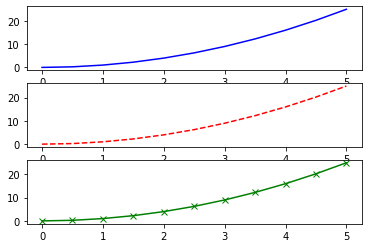

In [59]:
# Stack the plots using subplot.
plt.subplot(3,1,1)
plt.plot(x,y,'b')
plt.subplot(3,1,2)
plt.plot(x,y,'r--')
plt.subplot(3,1,3)
plt.plot(x,y,'g-x')
;

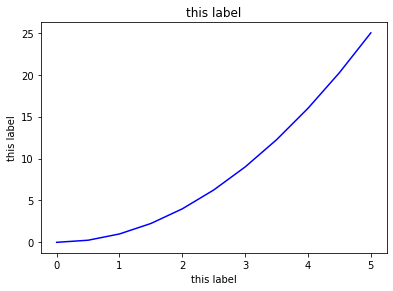

In [60]:
# Create the Figure
fig = plt.figure()
# Add set of axes to figure
 # left, bottom, width, height (range 0 to 1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Plot on that set of axes
ax.plot(x,y,'b')
ax.set_xlabel('this label')
ax.set_ylabel('this label')
ax.set_title('this label');

In [61]:
# Import IPython.diplay - display and image 
from IPython.display import display, Image
# Display the file from url.
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
img = Image(url=url, width=400)

display(img)

In [0]:
# Use the fivethirtyeight plot style.
plt.style.use('fivethirtyeight')

In [63]:
# Create some data to replicate the blog post figure.
some_data=[13,5,12,1,7,9,25,13,15,33]
data = pd.Series(some_data, index=range(1,11))
data

1     13
2      5
3     12
4      1
5      7
6      9
7     25
8     13
9     15
10    33
dtype: int64

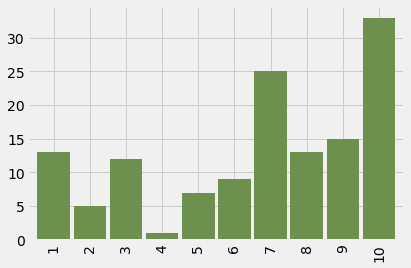

In [65]:
data.plot.bar(color='C3', width=0.9);

In [66]:
display(img)

In [0]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


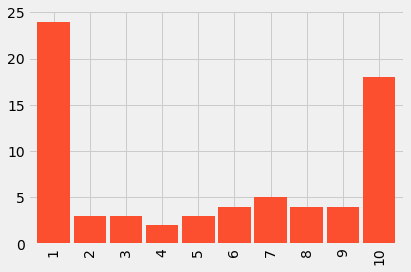

In [69]:
data2 = pd.Series(fakelist2)
data2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

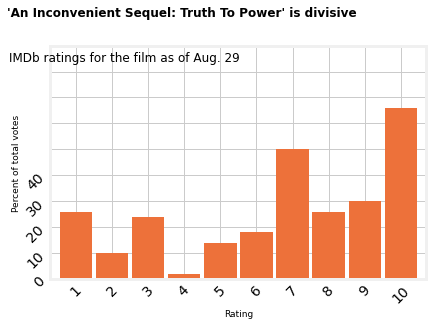

In [71]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Set the bars
data.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=45)
ax.set_yticklabels(range(0,50,10), rotation=45)
ax.set_yticks(range(0,50,5));

In [72]:
display(img)

In [73]:
# read the data from 538's github repo
ratings = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
ratings.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# Convert timestamps strings to actual datetime objects
ratings['timestamp1'] = pd.to_datetime(ratings['timestamp'])

In [75]:
# verify the data worked.
ratings[['timestamp', 'timestamp1']].sample(5)

,timestamp,timestamp1
40663,2017-08-15 13:30:05.744742,2017-08-15 13:30:05.744742
16343,2017-08-06 15:50:05.654216,2017-08-06 15:50:05.654216
52381,2017-08-19 20:30:04.959958,2017-08-19 20:30:04.959958
6141,2017-07-31 01:00:06.239421,2017-07-31 01:00:06.239421
19133,2017-08-07 16:30:04.992538,2017-08-07 16:30:04.992538


In [76]:
# Set the timestamp as the index.
ratings.set_index('timestamp1', inplace=True, drop=True)
ratings.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp1,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [77]:
lastday = ratings['2017-08-29']
print(ratings.shape)
print(lastday.shape)

(80053, 27)
(2660, 27)


In [78]:
# Value counts from lastday category.
lastday['category'].value_counts().sort_index()

Aged 18-29            140
Aged 30-44            140
Aged 45+              140
Aged under 18         140
Females               140
Females Aged 18-29    140
Females Aged 30-44    140
Females Aged 45+      140
Females under 18      140
IMDb staff            140
IMDb users            140
Males                 140
Males Aged 18-29      140
Males Aged 30-44      140
Males Aged 45+        140
Males under 18        140
Non-US users          140
Top 1000 voters       140
US users              140
Name: category, dtype: int64

In [79]:
# Gt the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category']=='IMDb users']
lastday_filtered.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp1,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [82]:
# Disaply the last line from the IMDB rating.
final = lastday_filtered.tail(1)
final

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp1,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [83]:
#transpose that.
final.T

timestamp1,2017-08-29 23:10:06.218251
timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38


In [84]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp1,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [85]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns =['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


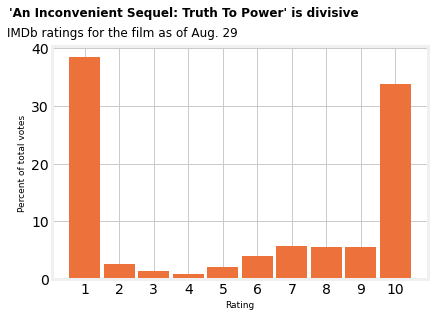

In [86]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.25, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [87]:
display(img)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here